<h1, align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;数据科学引论 - Python之道 </h1>

<h1, align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;第8课 数据可视化 作业 - 星巴克:从西雅图到世界各地</h1>

#### 目录
1. [星巴克: 背景](#top)
1. [plotly库](#plotly)
1. [获得数据](#getdata)
1. [了解数据](#understand)

# 星巴克

<img src=https://upload.wikimedia.org/wikipedia/en/thumb/d/d3/Starbucks_Corporation_Logo_2011.svg/594px-Starbucks_Corporation_Logo_2011.svg.png width=100 align=left></img>


星巴克是一家起源于西雅图的美国咖啡公司。他们在世界各地经营着大型连锁咖啡店，拥有超过23000家分店，其中包括:
- 美国`>13000` 处
- 中国`>2700`处
- 加拿大`>1400`处 
- 日本`>1000`处 
- 韩国`>800`处

### 加载库

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

#increase figure size
from pylab import rcParams
rcParams['figure.figsize'] = (14,10)

<a id="getdata"></a>
## 获得数据

数据由 [chrismeller](https://github.com/chrismeller/StarbucksScraper)爬取供大家使用. 数据集(starbucks.csv)也已被上传到IBM Box，以方便本教程.

下载数据

In [2]:
# !wget --output-document ./starbucks.csv https://ibm.box.com/shared/static/o6yl1g9z9nmzl6asf4abby5gvsrjeqk3.csv
#自行下载

--2017-12-01 23:05:10--  https://ibm.box.com/shared/static/o6yl1g9z9nmzl6asf4abby5gvsrjeqk3.csv
正在解析主机 ibm.box.com (ibm.box.com)... 107.152.25.197
正在连接 ibm.box.com (ibm.box.com)|107.152.25.197|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 301 Moved Permanently
位置：https://ibm.ent.box.com/shared/static/o6yl1g9z9nmzl6asf4abby5gvsrjeqk3.csv [跟随至新的 URL]
--2017-12-01 23:05:12--  https://ibm.ent.box.com/shared/static/o6yl1g9z9nmzl6asf4abby5gvsrjeqk3.csv
正在解析主机 ibm.ent.box.com (ibm.ent.box.com)... 107.152.25.211
正在连接 ibm.ent.box.com (ibm.ent.box.com)|107.152.25.211|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 302 Found
位置：https://public.boxcloud.com/d/1/2QuTzFiupFetGMJFpUcwUlm0ZKsB1vaC0YS0YbeqL5PsNuFpa27tNXtOROVJwnB0ju2jgF_z4eQvWPWuUgOuxQAYV-jkDbt9UnSwqARKYTJGmIoL6xq3IhdYife1wWgnyA_HtMQ9Au3AQDCtkWIk1-5Ukmek2M6Y0XVcjjaBVxjmz6ll2r--9jojkAn_em_eD1y5-LkFK1nLN91wBMvX3N5DcMnE0nHRCSEHQW6w1kl6bN2r9REz6ig0zExTNiyXHfcSLdeymB7adSbxBDlLve-pyU4LwqOfTMqmRTWSlGRi_ynIvgv-TtgSpCxGBejT-MDvQD2J_9_C2BKrEa1a_1BZl-5_HGPP4OupsneQAOZyvhY

#### 读入数据:

创建一个变量 **`df`** 读入 **`starbucks.csv`** 内的数据.

In [3]:
import pandas as pd
df = pd.read_csv("./starbucks.csv")

<a id="understand"></a>
## 了解数据

#### 查看数据前几行:

In [4]:
df.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


#### 数据中一共有几处地点?

In [7]:
df[['Longitude', 'Latitude']].drop_duplicates().shape[0]

19726

#### 美国有几家分店?

In [8]:
df[df["Country"]=="US"].shape[0]

13608

#### 中国有几家分店?

In [9]:
df[df["Country"]=="CN"].shape[0]

2734

#### 在地图上绘制出每家中国分店

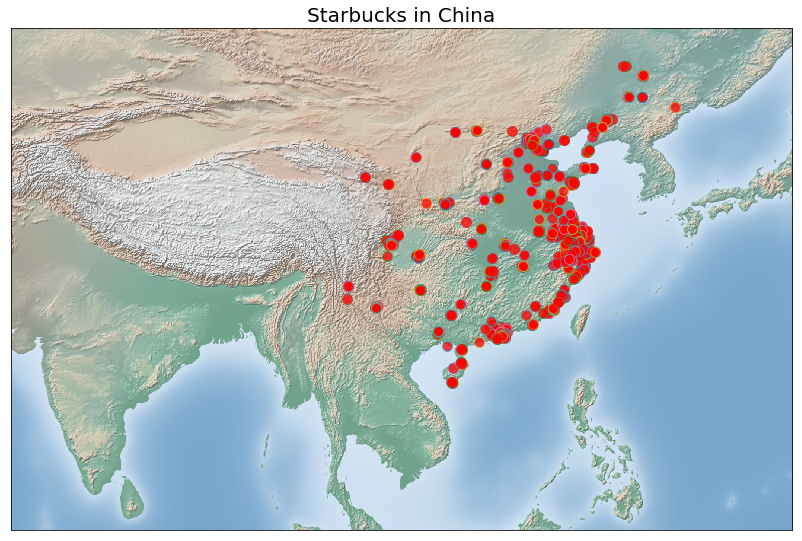

In [15]:
dfCN = df[df["Country"]=="CN"]
df_location = dfCN[['Longitude', 'Latitude']].drop_duplicates()
longitude_list = df_location.Longitude.values
latitude_list = df_location.Latitude.values

my_map = Basemap(
            llcrnrlon=70, llcrnrlat=5, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=140, urcrnrlat=50) #max longitude (urcrnrlon) and latitude (urcrnrlat)

for (lon, lat) in zip(longitude_list, latitude_list):
    my_map.plot(lon, 
                lat,
                markerfacecolor = 'red', 
                marker='o', 
                markersize= 10, 
                alpha = 0.75)
    
    
#add title
plt.title("Starbucks in China", fontsize = 20)

my_map.shadedrelief()
